<a href="https://colab.research.google.com/github/rayo80/DNN_Module/blob/main/YOLO_tiny_red.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [65]:
yolo = cv2.dnn.readNet('./yolov3-tiny.cfg.txt','./yolov3-tiny.weights')

In [66]:
#traemos las clases
classes =[]
with open("./coco.names",'r') as f:
  classes=f.read().splitlines()

In [67]:
classes[0:5]

['person', 'bicycle', 'car', 'motorbike', 'aeroplane']

In [68]:
len(classes)

80

Cargamos imagen

In [69]:
#cargar imagen
img=cv2.imread('./Merida_2.jpg')

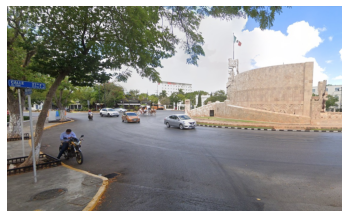

In [70]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

In [71]:
img.shape

(688, 1126, 3)

In [72]:
height, width = img.shape[:2]

In [73]:
#Realizamos el acondicionamiento de la imagen para que entre a la red
blob = cv2.dnn.blobFromImage(img, scalefactor = 1/255, size = (320, 320), mean= (0, 0, 0), swapRB = True, crop=False)

In [74]:
yolo.setInput(blob)

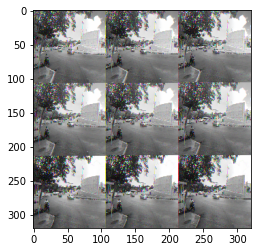

In [75]:
i=blob[0].reshape(320,320,3)
plt.imshow(i)

In [76]:
output_layer_names=yolo.getUnconnectedOutLayersNames() #obtiene la lista de las capas finales
layerout=yolo.forward(output_layer_names)#obtiene el valor de salida de las capas indicadas.

In [77]:
output_layer_names

['yolo_16', 'yolo_23']

La salida nos proporciona muchas cajas y cada caja tiene sus respectivos scores para las 80 clase.Luego tenemos que escoger el mayor de estos scores para compararlo con nuestro confidence.
Si es mayor que confidence significa que es un objeto detectado

In [78]:
boxes =[]
confidences=[]
class_ids=[]
for output in layerout:
  for detection in output:
    score=detection[5:]
    class_id=np.argmax(score)#Identifica el score mas alto de la clase del objeto detectado mediante la máxima confianza
    confidence=score[class_id]
    if confidence>0.7:
      # El objeto es detectado
      center_x = int(detection[0] * width) #converting center_x with respect to original image size
      center_y = int(detection[1] * height)#converting center_y with respect to original image size
      w = int(detection[2] * width)#converting width with respect to original image size
      h = int(detection[3] * height)#converting height with respect to original image size

      x=int(center_x -w/2)
      y=int(center_y -h/2)
      boxes.append([x,y,w,h])
      confidences.append(float(confidence))
      class_ids.append(class_id)

      print(boxes)

[[549, 373, 47, 29]]


In [79]:
len(boxes)


1

Dibujo de los cuadros en la imagen

In [80]:
colors = np.random.uniform(0, 255, size=(len(classes), 3))

In [81]:
#funcion que acepta la imagen ,los boxes de la imagen,la clase y el color
def draw_bouding_boxes(img,boxes,confidences,class_ids,colors):
    for i in range(len(boxes)):
            x, y, w, h = boxes[i]
            label = str(classes[class_ids[i]]) + ' :' + str(int(confidences[i]*100)) + '%'
            color = colors[i]
            cv2.rectangle(img, (x, y), (x + w, y + h), color, 3)
            cv2.putText(img, label, (x, y - 15),cv2.FONT_HERSHEY_PLAIN ,2, color, 3)
    return img

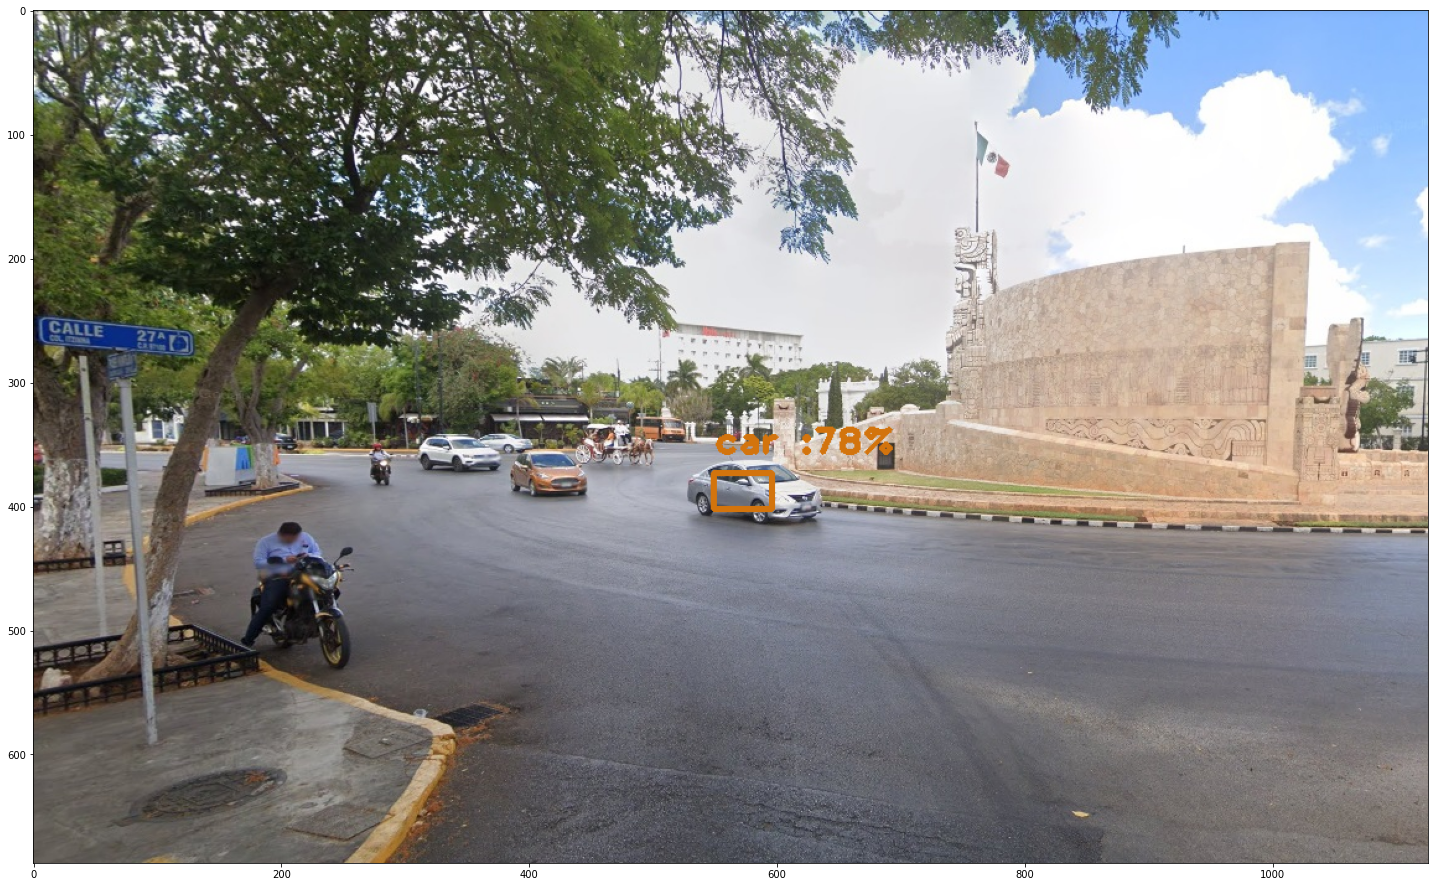

In [82]:
#ver imagen detectada
draw_bouding_boxes(img,boxes,confidences,class_ids,colors)
plt.figure(figsize=(25,30))
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
